<a href="https://colab.research.google.com/github/ramonfercruz/carteira_acoes/blob/main/analise_acao_anim3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Python para Finanças- Vizualização de dados financeiros

In [ ]:
!pip install -q yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 83.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


<h2>Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
from google.colab import drive

#Analise empresas de educação
##Acões
<li> Ânima (ANIM3) - ANIM3.SA
<li>Cogna (COGN3) - COGN3.SA
<li>Cruzeiro do Sul (CSED3) - CSED3.SA abertura em 2021
<li>Ser Educacional (SEER3)  - SEER3.SA
<li>YDUQS (YDUQ3) - YDUQ3.SA

##Benchmark
<li>Ibovesp - BOVA11.SA

## Objetivo comprar ou não a ação da Anima Educeção
### HIpoteses
<li> Ações ANIM3 sobre no final do ano
<li> Ações ANIM3 caem no inicio do ano
<li> Ações são afatadas pelo muito com cenario Politico

In [ ]:
sns.set_style('darkgrid')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lista ações
lista_acoes = ['ANIM3.SA', 'COGN3.SA','SEER3.SA', 'YDUQ3.SA', 'BOVA11.SA']

In [ ]:
import os
diretorio = '/content/drive/MyDrive/ia_expert/Python para Finanças Análise de Dados e Machine Learning/'
os.listdir(diretorio)

['.DS_Store',
 'Slides',
 'Bases de Dados',
 'Cópia de Python para finanças - taxas de retorno.ipynb',
 'Cópia de Python para finanças - visualização de dados financeiros.ipynb',
 'Cópia de Python para finanças - risco de ações.ipynb',
 'Python Para Finanças.ipynb']

<h2>Base de dados com uma ação

In [ ]:
dict_acoes = {}
for acao in lista_acoes:
  print(acao)
  df = yf.download(acao, start='2015-01-01')
  dict_acoes[acao] = df

ANIM3.SA
[*********************100%***********************]  1 of 1 completed
COGN3.SA
[*********************100%***********************]  1 of 1 completed
SEER3.SA
[*********************100%***********************]  1 of 1 completed
YDUQ3.SA
[*********************100%***********************]  1 of 1 completed
BOVA11.SA
[*********************100%***********************]  1 of 1 completed


In [ ]:
dados = pd.DataFrame()
for chave, valor in dict_acoes.items():
  nome_acao, _ = chave.split('.')
  dados[nome_acao] = valor.Close

In [ ]:
dados.head()

ANIM3  COGN3      SEER3      YDUQ3     BOVA11
Date                                                         
2015-01-02  11.183333  14.80  26.056252  22.049999  47.259998
2015-01-05  10.483333  13.72  23.773952  20.730000  46.320000
2015-01-06   9.000000  12.80  20.502657  19.520000  46.580002
2015-01-07   8.570000  12.61  20.255407  18.910000  48.150002
2015-01-08   8.503333  13.60  20.588243  19.500000  48.509998

In [ ]:
dados.tail()

ANIM3  COGN3  SEER3      YDUQ3     BOVA11
Date                                                 
2022-01-03   7.92   2.39  10.05  20.000000  99.930000
2022-01-04   7.42   2.29   9.82  19.670000  99.570000
2022-01-05   6.98   2.14   9.41  18.910000  97.099998
2022-01-06   7.11   2.09   9.60  18.889999  97.849998
2022-01-07   7.11   2.08   9.61  18.900000  98.699997

In [ ]:
dados.describe()

ANIM3        COGN3        SEER3        YDUQ3       BOVA11
count  1743.000000  1743.000000  1743.000000  1743.000000  1743.000000
mean      6.949384    10.407028    17.697801    25.032892    78.456525
std       2.523772     4.234161     6.379522     8.848859    23.612660
min       2.993333     2.080000     5.705748    10.640000    36.450001
25%       4.833333     7.600000    13.340971    17.285000    57.260000
50%       6.526666    10.800000    16.309999    24.969999    76.650002
75%       8.683333    13.325000    22.178662    31.330000    98.544998
max      14.300000    21.230000    34.360001    56.599998   125.750000

In [ ]:
dados.isna().sum()

ANIM3     0
COGN3     0
SEER3     0
YDUQ3     0
BOVA11    0
dtype: int64

In [ ]:
dados.shape

(1743, 5)

In [ ]:
dados.corr()

ANIM3     COGN3     SEER3     YDUQ3    BOVA11
ANIM3   1.000000 -0.422138  0.289519  0.753645  0.801343
COGN3  -0.422138  1.000000  0.582353 -0.129310 -0.530470
SEER3   0.289519  0.582353  1.000000  0.598289  0.277769
YDUQ3   0.753645 -0.129310  0.598289  1.000000  0.782870
BOVA11  0.801343 -0.530470  0.277769  0.782870  1.000000

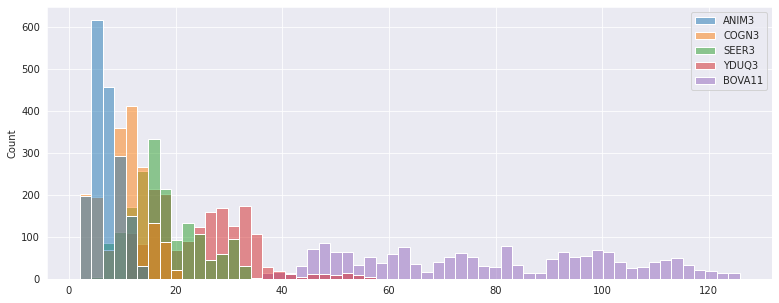

In [ ]:
plt.figure(figsize=(13,5))
sns.histplot(dados)

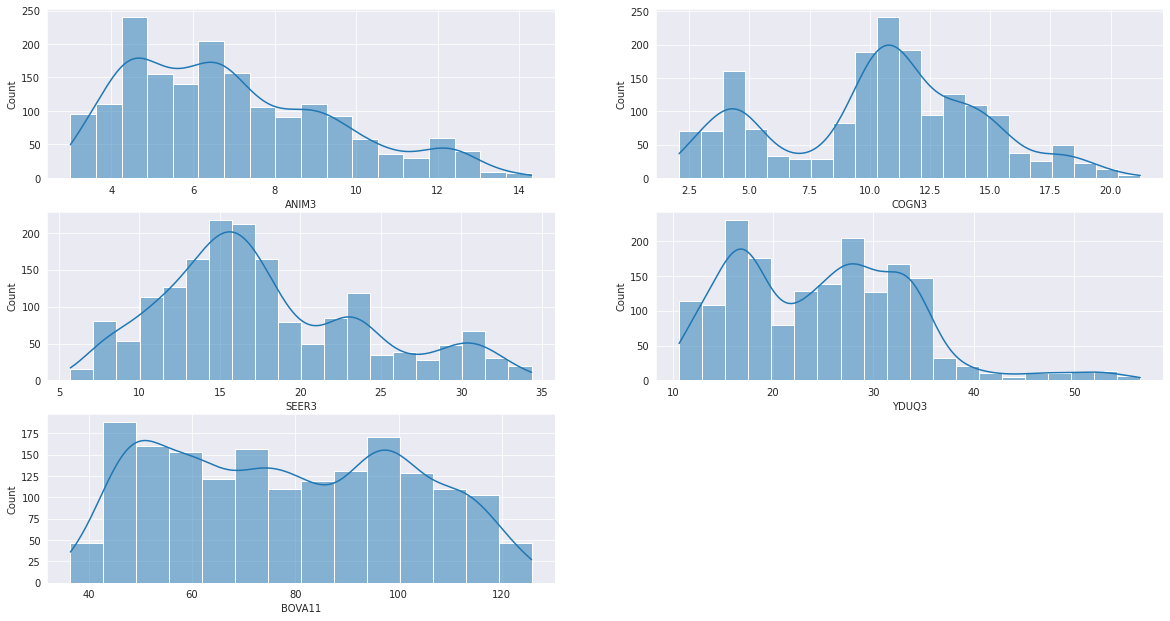

In [ ]:
plt.figure(figsize=(20,18))
tamanho = len(dados.columns)
for i, acao in enumerate(dados.columns):
  coluna = 1 if i%2 else 2
  plt.subplot(tamanho, 2, i + 1)
  sns.histplot(dados[acao], kde = True)

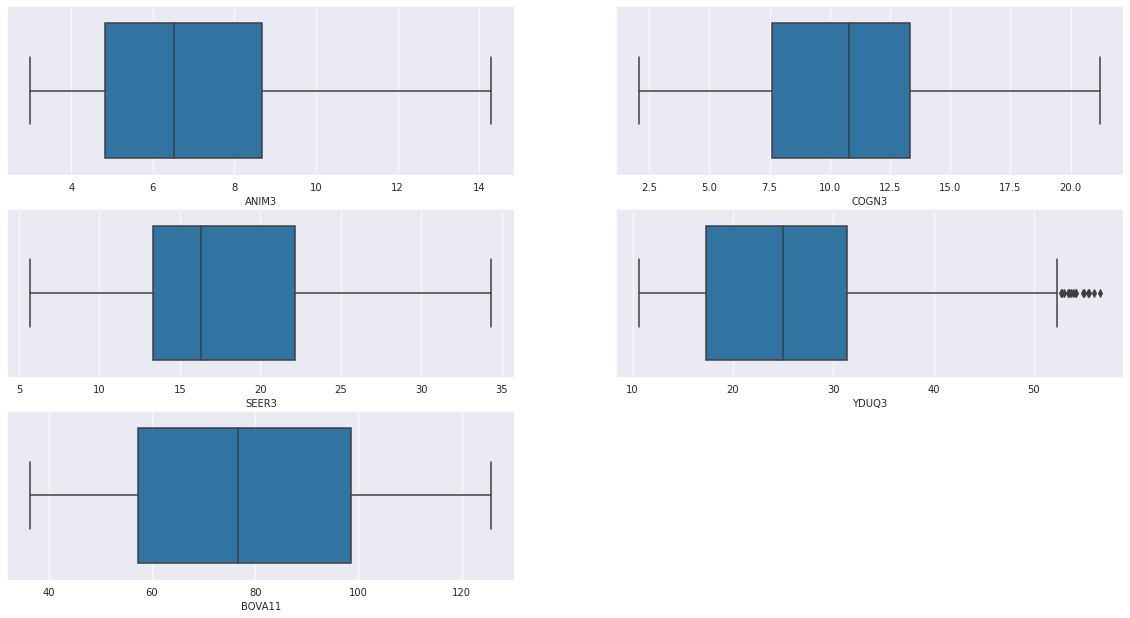

In [ ]:
plt.figure(figsize=(20,18))
tamanho = len(dados.columns)
for i, acao in enumerate(dados.columns):
  coluna = 1 if i%2 else 2
  plt.subplot(tamanho, 2, i + 1)
  sns.boxplot(x=dados[acao])
plt.show()

In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in dados.columns:
  figura.add_scatter(x = dados.index, y = dados[i], name = i)
figura.show()

In [ ]:
dados_normalizado = dados.copy()
for i in dados_normalizado.columns:
  dados_normalizado[i] = dados_normalizado[i] / dados_normalizado[i][0]

In [ ]:
dados_normalizado.head()

ANIM3     COGN3     SEER3     YDUQ3    BOVA11
Date                                                        
2015-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
2015-01-05  0.937407  0.927027  0.912409  0.940136  0.980110
2015-01-06  0.804769  0.864865  0.786861  0.885261  0.985612
2015-01-07  0.766319  0.852027  0.777372  0.857596  1.018832
2015-01-08  0.760358  0.918919  0.790146  0.884354  1.026449

In [ ]:
figura = px.line(title = 'Histórico do preço das ações normalizados')
for i in dados_normalizado.columns:
  figura.add_scatter(x = dados_normalizado.index, y = dados_normalizado[i], name = i)
figura.show()

In [ ]:
dados_media_7 = dados.rolling(7).mean()
figura = px.line(title = 'Media movel 7 dias')
for i in dados_media_7.columns:
  figura.add_scatter(x = dados_media_7.index, y = dados_media_7[i], name = i)
figura.show()

In [ ]:
dados_media_30 = dados.rolling(30).mean()
figura = px.line(title = 'Media movel 30 dias')
for i in dados_media_30.columns:
  figura.add_scatter(x = dados_media_30.index, y = dados_media_30[i], name = i)
figura.show()

In [ ]:
dados_media_90 = dados.rolling(90).mean()
dados_media_90.tail()

ANIM3     COGN3      SEER3      YDUQ3      BOVA11
Date                                                            
2022-01-03  8.509556  2.778889  11.713000  23.615889  105.216222
2022-01-04  8.482444  2.767667  11.665000  23.539000  105.066444
2022-01-05  8.443889  2.753778  11.603778  23.439111  104.860555
2022-01-06  8.407556  2.739333  11.545889  23.338222  104.657333
2022-01-07  8.375000  2.724667  11.493333  23.237778  104.486555

In [ ]:
figura = px.line(title = 'Media movel 90 dias')
for i in dados_media_90.columns:
  figura.add_scatter(x = dados_media_90.index, y = dados_media_90[i], name = i)
figura.show()

In [ ]:
figura = px.line(title = 'Media movel 7 dias')
i = 'ANIM3'
figura.add_scatter(x = dados_media_7.index, y = dados_media_7[i], name = i + ' 7')
figura.add_scatter(x = dados_media_30.index, y = dados_media_30[i], name = i + ' 30')
figura.add_scatter(x = dados_media_90.index, y = dados_media_90[i], name = i + ' 90')
figura.show()

In [ ]:
dados_volatilidade_30 = dados.rolling(30).std() / dados.rolling(30).mean() * 100
figura = px.line(title = 'Volatilidade movel 30 dias')
for i in dados_volatilidade_30.columns:
  figura.add_scatter(x = dados_volatilidade_30.index, y = dados_volatilidade_30[i], name = i)
figura.show()

In [ ]:
dados_diff = dados.diff()

In [ ]:
lista_acoes = ['ANIM3', 'COGN3', 'SEER3', 'YDUQ3', 'BOVA11']

In [ ]:
figura = px.line(title = 'Histórico do preço das diferenciação')
for i in lista_acoes:
  figura.add_scatter(x = dados_diff.index, y = dados_diff[i], name = i)
figura.show()

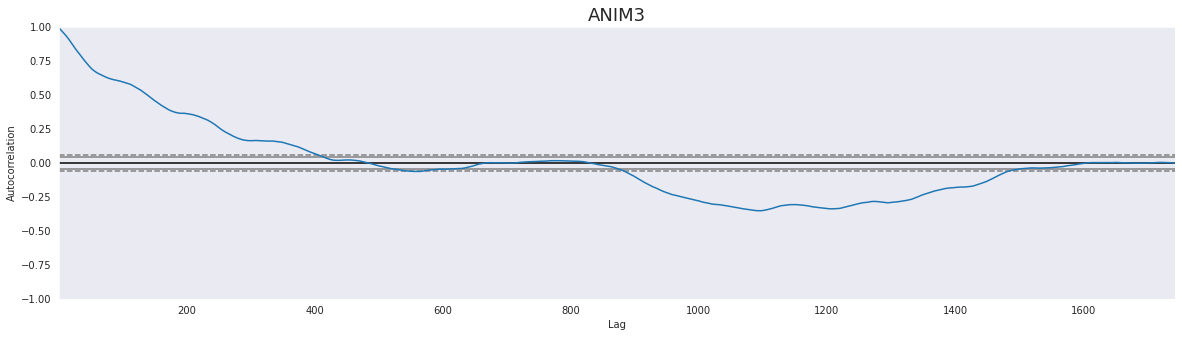

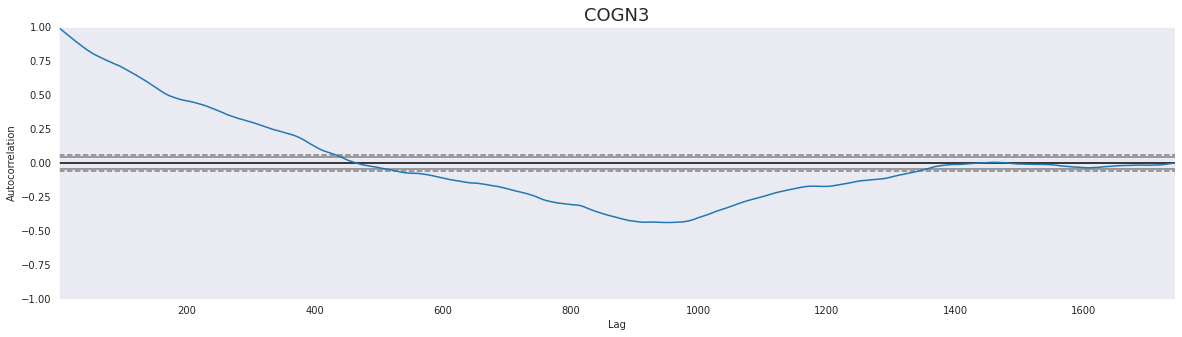

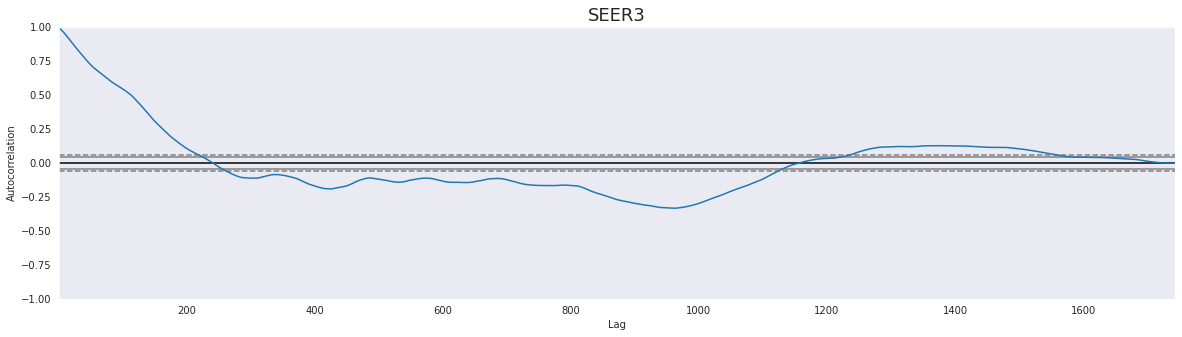

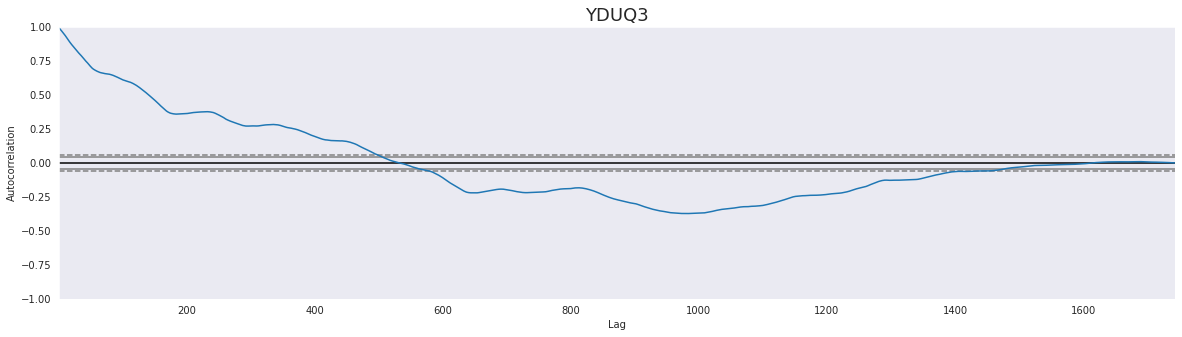

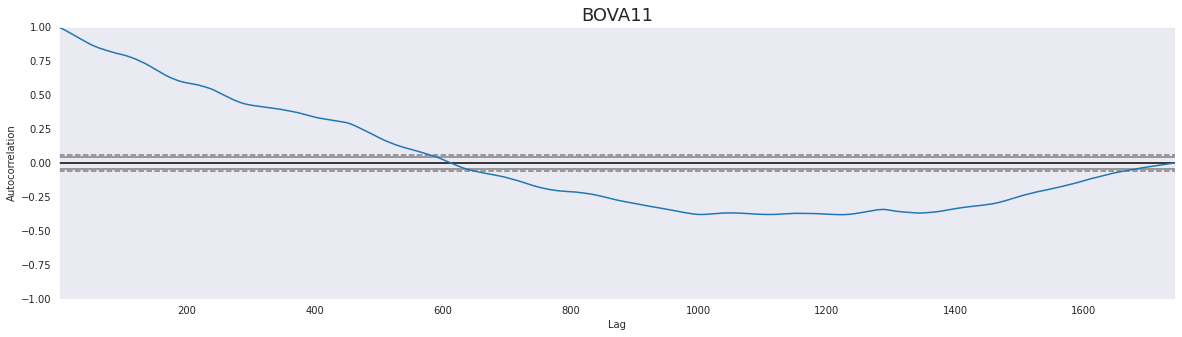

In [ ]:

tamanho = len(dados.columns)
for i, acao in enumerate(dados.columns):
  plt.figure(figsize=(20,5))
  ax = pd.plotting.autocorrelation_plot(dados[acao])
  plt.title(acao, fontsize=18)
  plt.show()

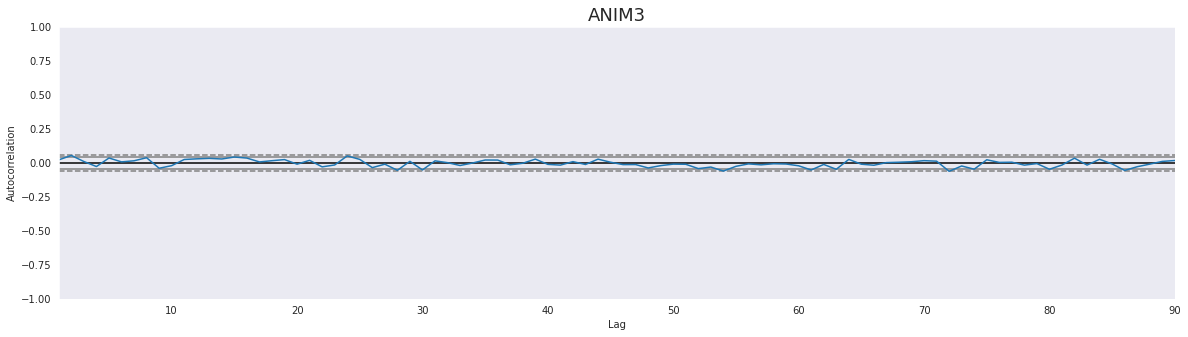

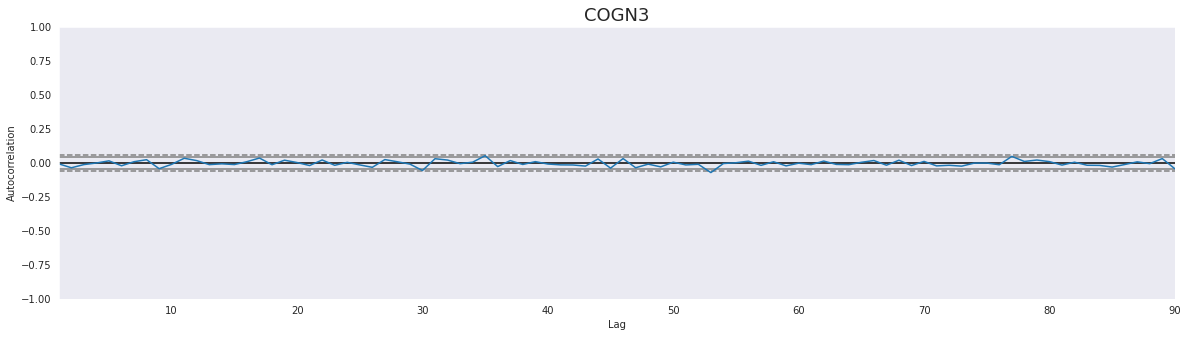

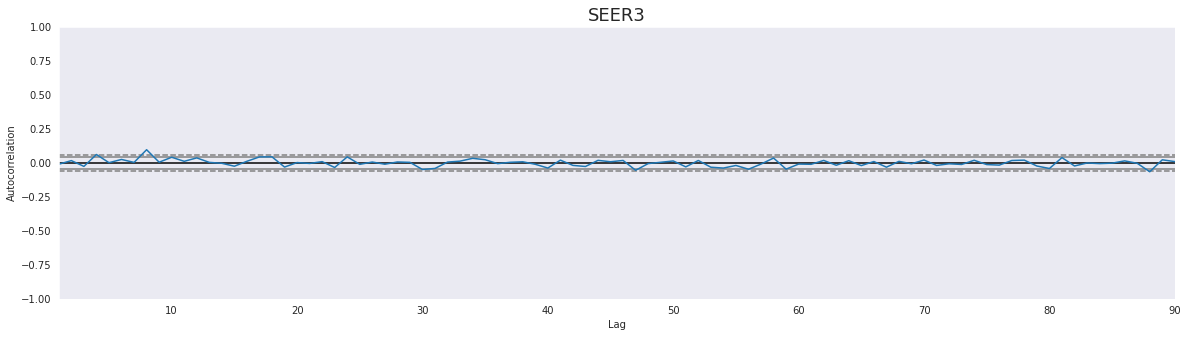

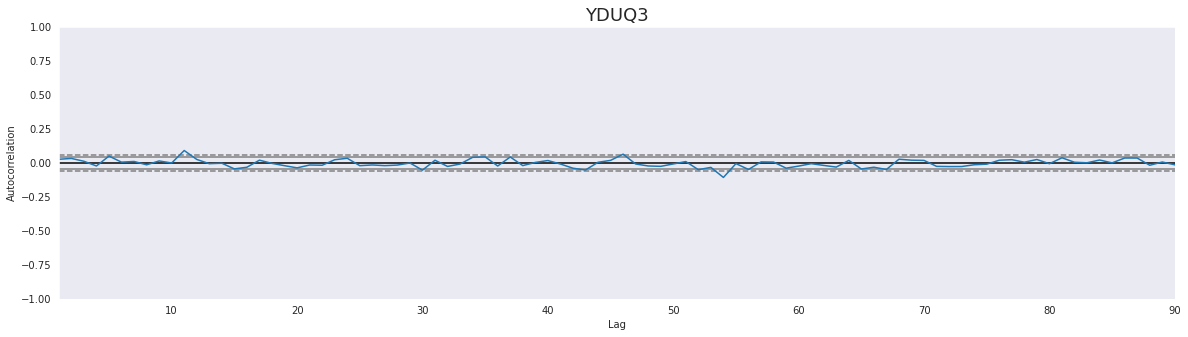

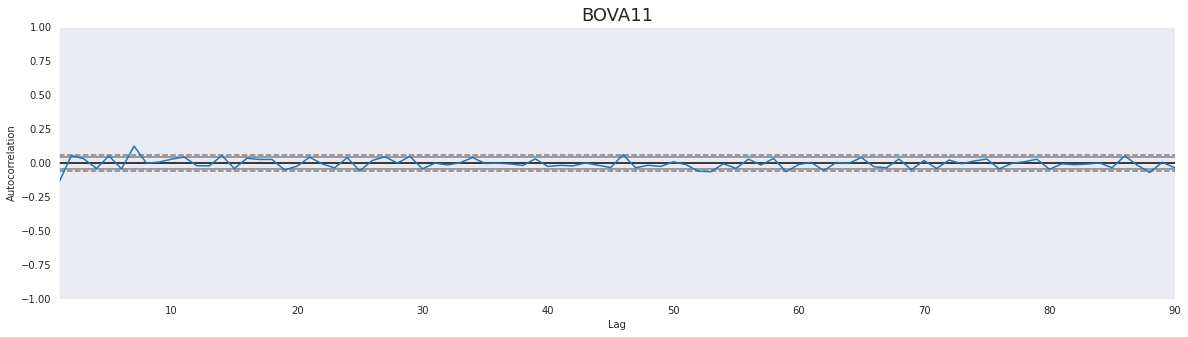

In [ ]:
tamanho = len(dados.columns)
for i, acao in enumerate(dados.columns):
  plt.figure(figsize=(20,5))
  ax = pd.plotting.autocorrelation_plot(dados_diff[acao][1:]).set_xlim([1, 90])
  plt.title(acao, fontsize=18)
  plt.show()

In [ ]:
dados_taxas_retorno = (dados / dados.shift(1)) - 1

In [ ]:
dados_taxas_retorno

ANIM3     COGN3     SEER3     YDUQ3    BOVA11
Date                                                        
2015-01-02       NaN       NaN       NaN       NaN       NaN
2015-01-05 -0.062593 -0.072973 -0.087591 -0.059864 -0.019890
2015-01-06 -0.141494 -0.067055 -0.137600 -0.058369  0.005613
2015-01-07 -0.047778 -0.014844 -0.012059 -0.031250  0.033705
2015-01-08 -0.007779  0.078509  0.016432  0.031200  0.007477
...              ...       ...       ...       ...       ...
2022-01-03 -0.057143 -0.028455 -0.041945 -0.027237 -0.008631
2022-01-04 -0.063131 -0.041841 -0.022886 -0.016500 -0.003603
2022-01-05 -0.059299 -0.065502 -0.041752 -0.038638 -0.024807
2022-01-06  0.018625 -0.023365  0.020191 -0.001058  0.007724
2022-01-07  0.000000 -0.004785  0.001042  0.000529  0.008687

[1743 rows x 5 columns]

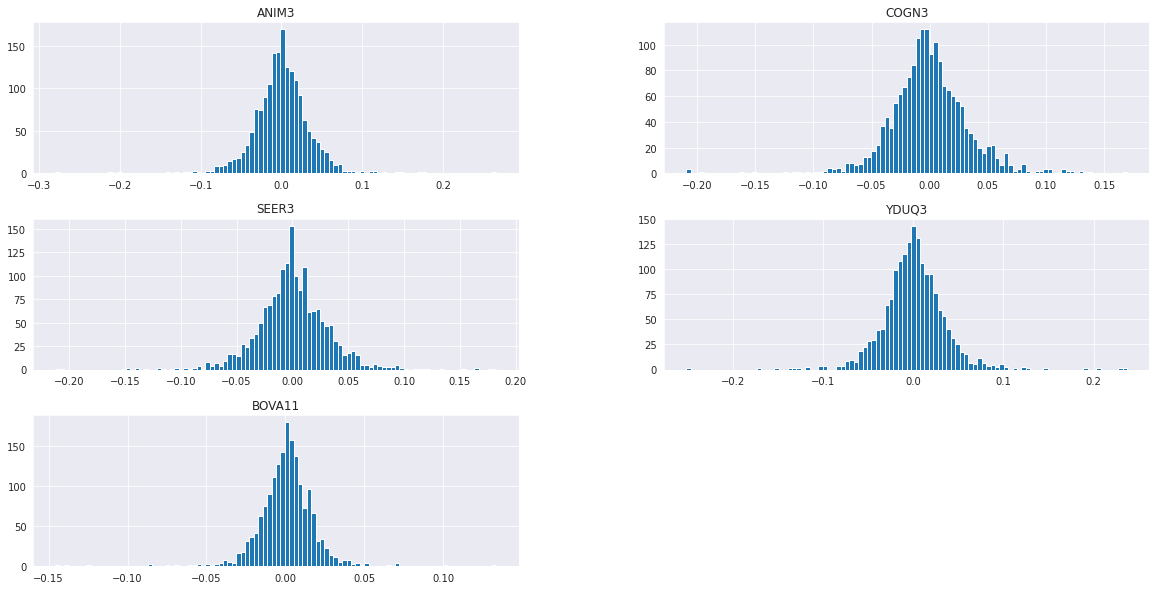

In [ ]:
dados_taxas_retorno.hist(figsize=(20,10), bins=100);

In [ ]:
dados_taxas_retorno['ano'] = dados_taxas_retorno.index.year
dados_taxas_retorno['mes'] = dados_taxas_retorno.index.month
dados_taxas_retorno['dia_semana'] = dados_taxas_retorno.index.weekday

In [ ]:
dados_taxas_retorno.head()

ANIM3     COGN3     SEER3  ...   ano  mes  dia_semana
Date                                      ...                       
2015-01-02       NaN       NaN       NaN  ...  2015    1           4
2015-01-05 -0.062593 -0.072973 -0.087591  ...  2015    1           0
2015-01-06 -0.141494 -0.067055 -0.137600  ...  2015    1           1
2015-01-07 -0.047778 -0.014844 -0.012059  ...  2015    1           2
2015-01-08 -0.007779  0.078509  0.016432  ...  2015    1           3

[5 rows x 8 columns]

In [ ]:
#Desvio padrão
dados_taxas_retorno.describe()[lista_acoes]

ANIM3        COGN3        SEER3        YDUQ3       BOVA11
count  1742.000000  1742.000000  1742.000000  1742.000000  1742.000000
mean      0.000321    -0.000544    -0.000011     0.000483     0.000564
std       0.033966     0.033970     0.033433     0.033863     0.016717
min      -0.280000    -0.209486    -0.212375    -0.251744    -0.145747
25%      -0.017736    -0.018868    -0.017279    -0.017878    -0.007742
50%       0.000000    -0.002167     0.000000     0.000000     0.000934
75%       0.018322     0.016904     0.017566     0.018571     0.009449
max       0.266272     0.170000     0.182874     0.237365     0.133951

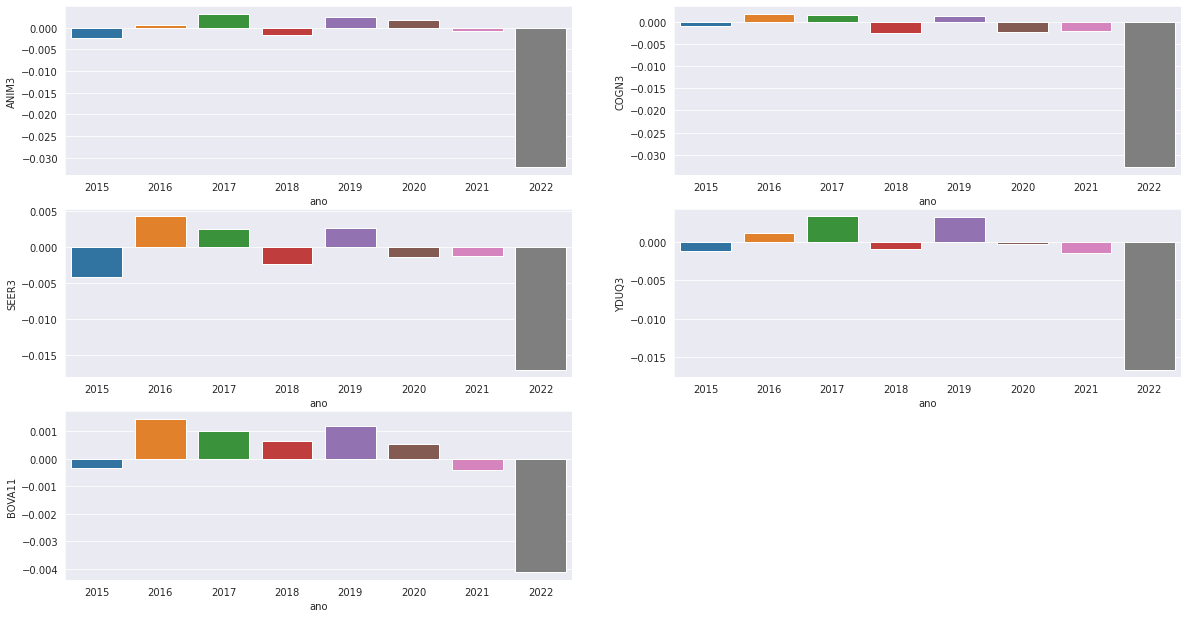

In [ ]:
dados_agrupado = dados_taxas_retorno.groupby(['ano'], as_index=False)[lista_acoes].mean()
plt.figure(figsize=(20,18))
tamanho = len(dados.columns)
for i, acao in enumerate(dados.columns):
  coluna = 1 if i%2 else 2
  plt.subplot(tamanho, 2, i + 1)
  sns.barplot(data=dados_agrupado, x='ano', y=acao)
plt.show()



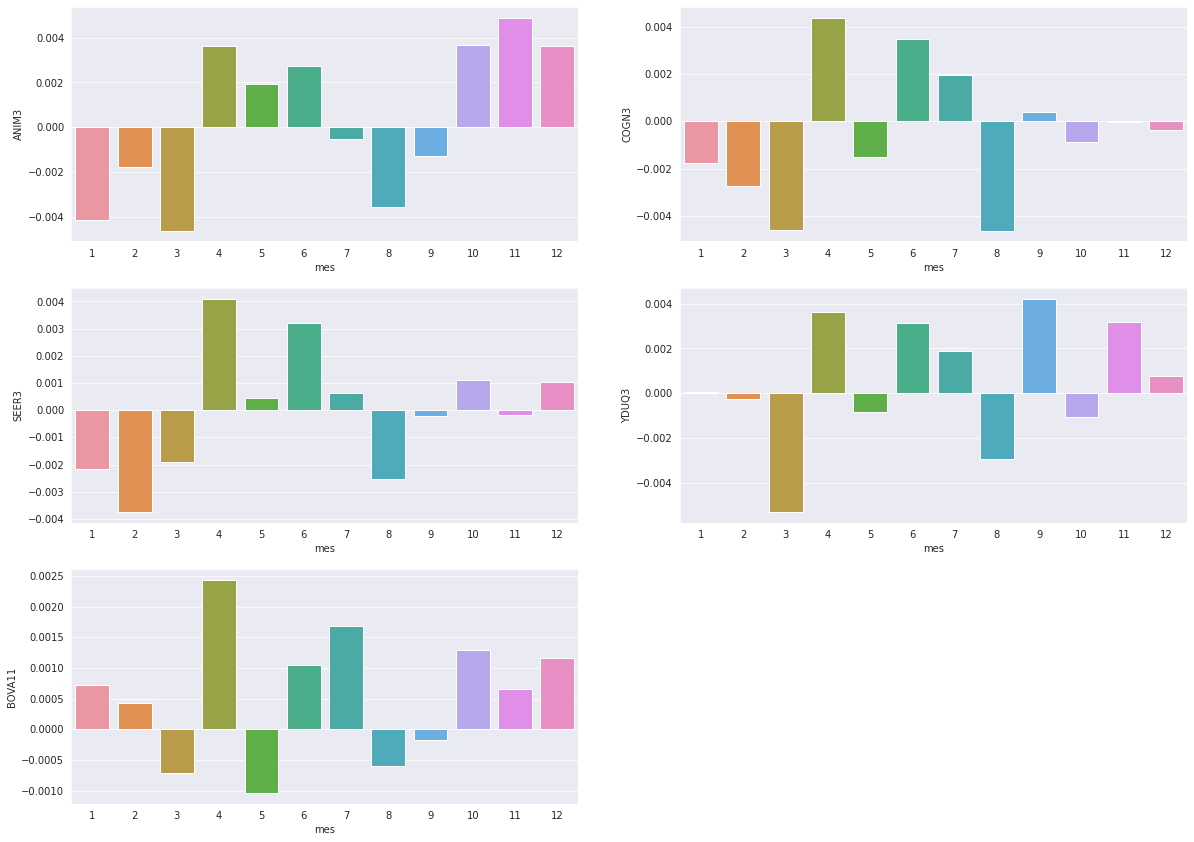

In [ ]:
dados_agrupado = dados_taxas_retorno.groupby(['mes'], as_index=False)[lista_acoes].mean()
plt.figure(figsize=(20,25))
tamanho = len(dados.columns)
for i, acao in enumerate(dados.columns):
  coluna = 1 if i%2 else 2
  plt.subplot(tamanho, 2, i + 1)
  sns.barplot(data=dados_agrupado, x='mes', y=acao)
plt.show()

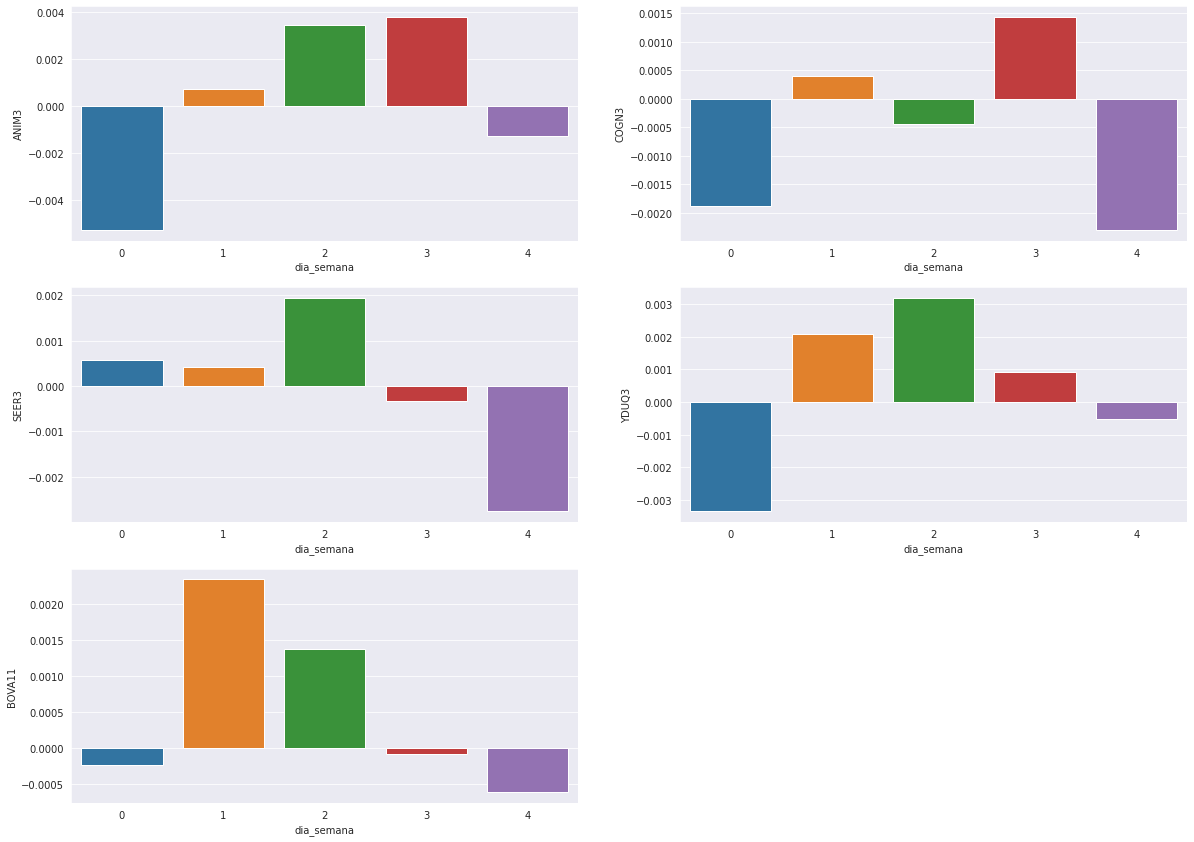

In [ ]:
dados_agrupado = dados_taxas_retorno.groupby(['dia_semana'], as_index=False)[lista_acoes].mean()
plt.figure(figsize=(20,25))
tamanho = len(dados.columns)
for i, acao in enumerate(dados.columns):
  coluna = 1 if i%2 else 2
  plt.subplot(tamanho, 2, i + 1)
  ax = sns.barplot(data=dados_agrupado, x='dia_semana', y=acao)
plt.show()

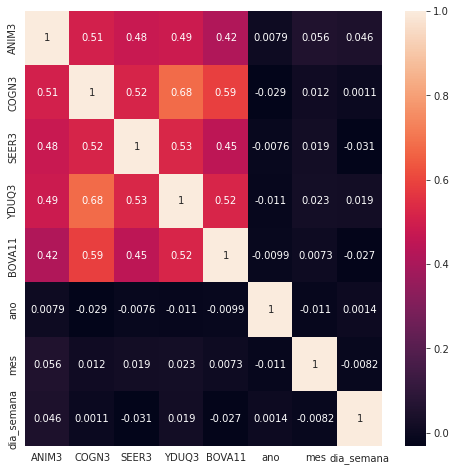

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(dados_taxas_retorno.corr(), annot=True);

In [ ]:
dados_temp = dados.copy()
dict_datas = {}
dados_temp['ano'] = dados_temp.index.year
anos_analise = dados_temp.ano.unique()
for ano in anos_analise:
  dict_temp = {}
  min = dados_temp.query(f'ano == {ano}').index.min()
  max = dados_temp.query(f'ano == {ano}').index.max()
  dict_temp['min'] = min
  dict_temp['max'] = max
  dict_datas[ano] = dict_temp

In [ ]:
resultado = []
for ano in anos_analise:
  series_max = dados_temp.loc[dict_datas[ano]['max'],:]
  series_min = dados_temp.loc[dict_datas[ano]['min'],:]
  for acao in lista_acoes:
    inicio = series_min[acao]
    fim = series_max[acao]
    taxa = ((fim / inicio) - 1) * 100
    dict_temp = {'valor_inicio': inicio,
                 'valor_final': fim,
                 'retorno': taxa,
                 'ano': ano,
                 'acao': acao}
    resultado.append(dict_temp)
    

In [ ]:
retorno_anual = pd.DataFrame(resultado)
retorno_anual

valor_inicio  valor_final     retorno   ano    acao
0      11.183333     4.600000  -58.867363  2015   ANIM3
1      14.800000     9.530000  -35.608111  2015   COGN3
2      26.056252     7.322377  -71.897810  2015   SEER3
3      22.049999    13.950000  -36.734693  2015   YDUQ3
4      47.259998    42.130001  -10.854840  2015  BOVA11
5       4.316666     4.543333    5.250972  2016   ANIM3
6       9.420000    13.330000   41.507429  2016   COGN3
7       7.179733    17.754389  147.284813  2016   SEER3
8      13.900000    15.800000   13.669069  2016   YDUQ3
9      41.099998    58.240002   41.703172  2016  BOVA11
10      4.416666     9.433333  113.584938  2017   ANIM3
11     13.300000    18.400000   38.345860  2017   COGN3
12     17.592726    31.299999   77.914438  2017   SEER3
13     15.450000    32.820000  112.427185  2017   YDUQ3
14     57.630001    73.820000   28.093004  2017  BOVA11
15      9.500000     5.666666  -40.350884  2018   ANIM3
16     18.340000     8.870000  -51.635770  2018   COGN3
17     31.610001    15.550000  -50.806707  2018   SEER3
18     33.869999    23.760000  -29.849421  2018   YDUQ3
19     75.099998    84.599998   12.649801  2018  BOVA11
20      6.003333     9.930000   65.408118  2019   ANIM3
21      9.250000    11.430000   23.567571  2019   COGN3
22     16.100000    27.750000   72.360244  2019   SEER3
23     24.850000    47.500000   91.146878  2019   YDUQ3
24     87.900002   111.230003   26.541526  2019  BOVA11
25      9.866666    12.000000   21.621632  2020   ANIM3
26     12.200000     4.630000  -62.049179  2020   COGN3
27     28.400000    15.620000  -45.000000  2020   SEER3
28     46.750000    32.919998  -29.582892  2020   YDUQ3
29    114.239998   114.650002    0.358897  2020  BOVA11
30     12.000000     8.400000  -30.000003  2021   ANIM3
31      4.700000     2.460000  -47.659572  2021   COGN3
32     15.350000    10.490000  -31.661241  2021   SEER3
33     34.000000    20.559999  -39.529413  2021   YDUQ3
34    114.089996   100.800003  -11.648693  2021  BOVA11
35      7.920000     7.110000  -10.227272  2022   ANIM3
36      2.390000     2.080000  -12.970718  2022   COGN3
37     10.050000     9.610000   -4.378115  2022   SEER3
38     20.000000    18.900000   -5.500002  2022   YDUQ3
39     99.930000    98.699997   -1.230865  2022  BOVA11

In [ ]:
retorno_anual_resumo = retorno_anual.pivot(columns='ano', values='retorno', index='acao').reset_index()
retorno_anual_resumo = retorno_anual_resumo.set_index('acao')
retorno_anual_resumo

ano          2015        2016        2017  ...       2020       2021       2022
acao                                       ...                                 
ANIM3  -58.867363    5.250972  113.584938  ...  21.621632 -30.000003 -10.227272
BOVA11 -10.854840   41.703172   28.093004  ...   0.358897 -11.648693  -1.230865
COGN3  -35.608111   41.507429   38.345860  ... -62.049179 -47.659572 -12.970718
SEER3  -71.897810  147.284813   77.914438  ... -45.000000 -31.661241  -4.378115
YDUQ3  -36.734693   13.669069  112.427185  ... -29.582892 -39.529413  -5.500002

[5 rows x 8 columns]

In [ ]:
#Retorno Medio
retorno_anual_resumo.mean(axis=1)

acao
ANIM3      8.302517
BOVA11    10.701500
COGN3    -13.312811
SEER3     11.726953
YDUQ3      9.505839
dtype: float64

In [ ]:
#Retorno mediana
retorno_anual_resumo.median(axis=1)

acao
ANIM3     -2.488150
BOVA11     6.504349
COGN3    -24.289415
SEER3    -18.019678
YDUQ3    -17.541447
dtype: float64

In [ ]:
#Desvio Padrao Retorno
retorno_anual_resumo.std(axis=1)

acao
ANIM3     57.596541
BOVA11    19.755029
COGN3     42.350273
SEER3     78.099321
YDUQ3     59.904661
dtype: float64

In [ ]:
#Coificiente de variação
retorno_anual_resumo.std(axis=1) / retorno_anual_resumo.mean(axis=1) * 100

acao
ANIM3     693.723840
BOVA11    184.600553
COGN3    -318.116684
SEER3     665.981372
YDUQ3     630.188043
dtype: float64

In [ ]:
#retorno variancia
retorno_anual_resumo.var(axis=1)

acao
ANIM3     3317.361564
BOVA11     390.261158
COGN3     1793.545665
SEER3     6099.504005
YDUQ3     3588.568379
dtype: float64

In [ ]:
credenciais = '/content/drive/MyDrive/credenciais/token_quandl.txt'

In [ ]:
with open(credenciais, 'r') as file:
    chave_quandl = file.read()

In [ ]:
pip install quandl

In [ ]:
import quandl

In [ ]:
selic = quandl.get("BCB/432", start_date= "2015-01-01")
selic.rename(columns={"Value" : "Selic"}, inplace=True)

In [ ]:
selic.tail()

Selic
Date             
2022-01-05   9.25
2022-01-06   9.25
2022-01-07   9.25
2022-01-08   9.25
2022-01-09   9.25

In [ ]:
selic

Selic
Date             
2015-01-01  11.75
2015-01-02  11.75
2015-01-03  11.75
2015-01-04  11.75
2015-01-05  11.75
...           ...
2022-01-05   9.25
2022-01-06   9.25
2022-01-07   9.25
2022-01-08   9.25
2022-01-09   9.25

[2566 rows x 1 columns]

In [ ]:
figura = px.line(title = 'Selic')
figura.add_scatter(x = selic.index, y = selic.Selic, name = 'Selic')
figura.show()

In [ ]:
dolar = quandl.get("BCB/10813", start_date= "2015-01-01")
dolar.rename(columns={"Value" : "dolar"}, inplace=True)

In [ ]:
figura = px.line(title = 'Dolar')
figura.add_scatter(x = dolar.index, y = dolar.dolar, name = 'Dolar')
figura.show()

In [ ]:
cdi = quandl.get("BCB/4392", start_date= "2015-01-01")
cdi.rename(columns={"Value" : "CDI"}, inplace=True)
ipca = quandl.get('BCB/13522', start_date = '2015-01-01')
ipca.rename(columns={"Value" : "IPC"}, inplace=True)
figura = px.line(title = 'CDI x IPC x ANIM#')
figura.add_scatter(x = cdi.index, y = cdi.CDI, name = 'CDI')
figura.add_scatter(x = ipca.index, y = ipca.IPC, name = 'IPC')
figura.add_scatter(x = dados.index, y = dados.ANIM3, name = 'ANIM3')
figura.show()

In [ ]:
dados['CDI'] = cdi.CDI

In [ ]:
dados['IPCA'] = ipca.IPC

In [ ]:
dados['Dolar'] = dolar.dolar

In [ ]:
dados.corr()

ANIM3     COGN3     SEER3  ...       CDI      IPCA     Dolar
ANIM3   1.000000 -0.422138  0.289519  ... -0.782121 -0.237788  0.577330
COGN3  -0.422138  1.000000  0.582353  ...  0.509844 -0.287955 -0.885409
SEER3   0.289519  0.582353  1.000000  ... -0.241284 -0.690158 -0.300980
YDUQ3   0.753645 -0.129310  0.598289  ... -0.790193 -0.597909  0.381265
BOVA11  0.801343 -0.530470  0.277769  ... -0.883773 -0.333335  0.703924
CDI    -0.782121  0.509844 -0.241284  ...  1.000000  0.574530 -0.747139
IPCA   -0.237788 -0.287955 -0.690158  ...  0.574530  1.000000 -0.025789
Dolar   0.577330 -0.885409 -0.300980  ... -0.747139 -0.025789  1.000000

[8 rows x 8 columns]

#Analise Fundamentalista
Fonte: http://dados.cvm.gov.br/dataset/cia_aberta-doc-itr

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=6bf45e761b323a403365618dfe898ed2ecdf8b35cf262b69d6e904bbcfde5e2e
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import pandas as pd
import wget
from zipfile import ZipFile

In [ ]:
def retorna_url_base(tipo):
  tipo = tipo.upper()
  url_base = f'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/{tipo}/DADOS/'
  return url_base

In [ ]:
def retorna_arquivos_zip(tipo):
  arquivos_zip = []
  for ano in range(2011, 2022):
    arquivos_zip.append(f'{tipo}_cia_aberta_{ano}.zip')
  return arquivos_zip

In [ ]:
##downloead arquivos
def extrai_arquivos_zip(url_base, arquivos_zip):
  for arg in arquivos_zip:
    wget.download(url_base+arg)
  for arg in arquivos_zip:
    ZipFile(arg, 'r').extractall('/content/drive/MyDrive/CVM')

In [ ]:
def lista_nomes(tipo):
  nomes = []
  for arquivo in os.listdir('/content/drive/MyDrive/CVM'):
    if tipo in arquivo:
      arquivo = arquivo.replace(f'{tipo}_cia_aberta_', '')
      arquivo, _ = arquivo.split('.')
      arquivo = arquivo[:-5]
      if arquivo not in nomes and arquivo != '':
        nomes.append(arquivo)
  return nomes

In [ ]:
def salva_arquivos(tipo, nomes):
  for nome in nomes:
    arquivo = pd.DataFrame()
    for ano in range(2011, 2022):
      arquivo = pd.concat([arquivo, pd.read_csv(f'/content/drive/MyDrive/CVM/{tipo}_cia_aberta_{nome}_{ano}.csv', sep=';', decimal=',', encoding='ISO-8859-1')])
    arquivo.to_csv(f'/content/drive/MyDrive/CVM/DADOS/{tipo}_cia_aberta_{nome}_2011_2021.csv', index=False)


In [ ]:
def salva_arquivos_geral(tipo):
  arquivo = pd.DataFrame()
  for ano in range(2011, 2022):
    arquivo = pd.concat([arquivo, pd.read_csv(f'/content/drive/MyDrive/CVM/{tipo}_cia_aberta_{ano}.csv', sep=';', decimal=',', encoding='ISO-8859-1')])
  arquivo.to_csv(f'/content/drive/MyDrive/CVM/DADOS/{tipo}_cia_aberta_2011_2021.csv', index=False)

In [ ]:
baixar_balancos = False
if baixar_balancos:
  tipos = ['itr', 'dfp']
  for tipo in tipos:
    print('iniciou', tipo)
    #url_base = retorna_url_base(tipo)
    #arquivos_zip = retorna_arquivos_zip(tipo)
    #extrai_arquivos_zip(url_base, arquivos_zip)
    nomes = lista_nomes(tipo)
    print(nomes)
    salva_arquivos(tipo, nomes)
    salva_arquivos_geral(tipo)

In [ ]:
diretorio_dados = '/content/drive/MyDrive/CVM/DADOS'
os.listdir(diretorio_dados)

['itr_cia_aberta_BPA_con_2011_2021.csv',
 'itr_cia_aberta_BPA_ind_2011_2021.csv',
 'itr_cia_aberta_BPP_con_2011_2021.csv',
 'itr_cia_aberta_BPP_ind_2011_2021.csv',
 'itr_cia_aberta_DFC_MD_con_2011_2021.csv',
 'itr_cia_aberta_DFC_MD_ind_2011_2021.csv',
 'itr_cia_aberta_DFC_MI_con_2011_2021.csv',
 'itr_cia_aberta_DFC_MI_ind_2011_2021.csv',
 'itr_cia_aberta_DMPL_con_2011_2021.csv',
 'itr_cia_aberta_DMPL_ind_2011_2021.csv',
 'itr_cia_aberta_DRA_con_2011_2021.csv',
 'itr_cia_aberta_DRA_ind_2011_2021.csv',
 'itr_cia_aberta_DRE_con_2011_2021.csv',
 'itr_cia_aberta_DRE_ind_2011_2021.csv',
 'itr_cia_aberta_DVA_con_2011_2021.csv',
 'itr_cia_aberta_DVA_ind_2011_2021.csv',
 'itr_cia_aberta_2011_2021.csv',
 'dfp_cia_aberta_BPA_con_2011_2021.csv',
 'dfp_cia_aberta_BPA_ind_2011_2021.csv',
 'dfp_cia_aberta_BPP_con_2011_2021.csv',
 'dfp_cia_aberta_BPP_ind_2011_2021.csv',
 'dfp_cia_aberta_DFC_MD_con_2011_2021.csv',
 'dfp_cia_aberta_DFC_MD_ind_2011_2021.csv',
 'dfp_cia_aberta_DFC_MI_con_2011_2021.csv',
 

In [ ]:
cia_aberta = pd.read_csv(os.path.join(diretorio_dados, 'itr_cia_aberta_2011_2021.csv'))
cia_aberta.head()

CNPJ_CIA  ...                                           LINK_DOC
0  00.000.000/0001-91  ...  http://www.rad.cvm.gov.br/ENETCONSULTA/frmDown...
1  00.000.000/0001-91  ...  http://www.rad.cvm.gov.br/ENETCONSULTA/frmDown...
2  00.000.000/0001-91  ...  http://www.rad.cvm.gov.br/ENETCONSULTA/frmDown...
3  00.000.208/0001-00  ...  http://www.rad.cvm.gov.br/ENETCONSULTA/frmDown...
4  00.000.208/0001-00  ...  http://www.rad.cvm.gov.br/ENETCONSULTA/frmDown...

[5 rows x 9 columns]

In [ ]:
cd_cvm_acoes = {'ANIM3': 23248,
               'COGN3': 17973,
               'SEER3': 23221,
               'YDUQ3': 21016
               }

In [ ]:
cia_aberta[['DENOM_CIA'	,'CD_CVM']].nunique()

DENOM_CIA    1091
CD_CVM       1071
dtype: int64

In [ ]:
arquivo_dre_itr = 'itr_cia_aberta_DRE_con_2011_2021.csv'
dre_itr = pd.read_csv(os.path.join(diretorio_dados, arquivo_dre_itr))

arquivo_dre_dfp = 'dfp_cia_aberta_DRE_con_2011_2021.csv'
dre_dfp = pd.read_csv(os.path.join(diretorio_dados, arquivo_dre_dfp))

In [ ]:
dre = pd.concat([dre_itr, dre_dfp])

In [ ]:
dre.head()

CNPJ_CIA    DT_REFER  ...   VL_CONTA ST_CONTA_FIXA
0  00.001.180/0001-26  2011-03-31  ...  6159172.0             S
1  00.001.180/0001-26  2011-03-31  ...  8551982.0             S
2  00.001.180/0001-26  2011-03-31  ...  -960060.0             S
3  00.001.180/0001-26  2011-03-31  ... -1127021.0             S
4  00.001.180/0001-26  2011-03-31  ...  -340660.0             N

[5 rows x 15 columns]

In [ ]:
dre_itr.DT_REFER.unique()

array(['2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
       '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
       '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
       '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
       '2014-03-30', '2015-03-31', '2015-06-30', '2015-09-30',
       '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30',
       '2016-12-31', '2017-03-31', '2017-06-30', '2017-09-30',
       '2017-12-31', '2017-05-31', '2017-08-31', '2017-11-30',
       '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
       '2018-05-31', '2018-08-31', '2018-11-30', '2019-03-31',
       '2019-06-30', '2019-09-30', '2019-12-31', '2019-05-31',
       '2019-08-31', '2019-11-30', '2020-03-31', '2020-06-30',
       '2020-09-30', '2020-12-31', '2020-05-31', '2020-08-31',
       '2020-11-30', '2021-03-31', '2021-06-30', '2021-09-30',
       '2021-05-31', '2021-08-31'], dtype=object)

In [ ]:
dre.columns

Index(['CNPJ_CIA', 'DT_REFER', 'VERSAO', 'DENOM_CIA', 'CD_CVM', 'GRUPO_DFP',
       'MOEDA', 'ESCALA_MOEDA', 'ORDEM_EXERC', 'DT_INI_EXERC', 'DT_FIM_EXERC',
       'CD_CONTA', 'DS_CONTA', 'VL_CONTA', 'ST_CONTA_FIXA'],
      dtype='object')

In [ ]:
['DT_REFER',  'ESCALA_MOEDA',  'CD_CONTA', 'DS_CONTA', 'VL_CONTA']

['DT_REFER', 'ESCALA_MOEDA', 'CD_CONTA', 'DS_CONTA', 'VL_CONTA']

In [ ]:
def calcular_mes(df):
  df['DT_REFER'] = pd.to_datetime(df['DT_REFER'])
  df['DT_INI_EXERC'] = pd.to_datetime(df['DT_INI_EXERC'])
  df['DT_FIM_EXERC'] = pd.to_datetime(df['DT_FIM_EXERC'])
  df['meses'] = df['DT_FIM_EXERC'].dt.to_period('M').astype(int) - df['DT_INI_EXERC'].dt.to_period('M').astype(int) + 1
  return df

In [ ]:
dre = calcular_mes(dre)
dre['DS_CONTA'] = dre['CD_CONTA'] + ' - ' + dre['DS_CONTA']

In [ ]:
dre_anima = dre.query('CD_CVM == 23248 and ORDEM_EXERC == "ÚLTIMO"')


In [ ]:
dre_anima = dre_anima[['DT_REFER', 'DS_CONTA', 'VL_CONTA', 'meses']].pivot(columns=['DT_REFER', 'meses'], index=['DS_CONTA'], values='VL_CONTA')

In [ ]:
data_ferencias = {}
for data, tipo in dre_anima.columns:
  ano = data.year
  data_ferencias.setdefault(ano, [None, None])
  if tipo == 9:
    data_ferencias[ano][1] = (data, tipo)
  elif tipo == 12:
    data_ferencias[ano][0] = (data, tipo) 


In [ ]:
data_ferencias

{2012: [(Timestamp('2012-12-31 00:00:00'), 12), None],
 2013: [(Timestamp('2013-12-31 00:00:00'), 12),
  (Timestamp('2013-09-30 00:00:00'), 9)],
 2014: [(Timestamp('2014-12-31 00:00:00'), 12),
  (Timestamp('2014-09-30 00:00:00'), 9)],
 2015: [(Timestamp('2015-12-31 00:00:00'), 12),
  (Timestamp('2015-09-30 00:00:00'), 9)],
 2016: [(Timestamp('2016-12-31 00:00:00'), 12),
  (Timestamp('2016-09-30 00:00:00'), 9)],
 2017: [(Timestamp('2017-12-31 00:00:00'), 12),
  (Timestamp('2017-09-30 00:00:00'), 9)],
 2018: [(Timestamp('2018-12-31 00:00:00'), 12),
  (Timestamp('2018-09-30 00:00:00'), 9)],
 2019: [(Timestamp('2019-12-31 00:00:00'), 12),
  (Timestamp('2019-09-30 00:00:00'), 9)],
 2020: [(Timestamp('2020-12-31 00:00:00'), 12),
  (Timestamp('2020-09-30 00:00:00'), 9)],
 2021: [None, (Timestamp('2021-09-30 00:00:00'), 9)]}

In [ ]:
for ano, (fim, inicio) in data_ferencias.items():
  if fim and inicio:
    data_refe = fim[0]
    dre_anima[(data_refe, 3)] = dre_anima[fim] - dre_anima[inicio] 

In [ ]:
colunas = []
for coluna in dre_anima.columns.sort_values():
  if coluna[1] == 3:
    colunas.append(coluna)

In [ ]:
dre_anima_tri = dre_anima[colunas]
dre_anima_tri.head()

DT_REFER                                      2013-03-31  ... 2021-09-30
meses                                                  3  ...          3
DS_CONTA                                                  ...           
3.01 - Receita de Venda de Bens e/ou Serviços   104340.0  ...   816681.0
3.02 - Custo dos Bens e/ou Serviços Vendidos    -44390.0  ...  -365272.0
3.03 - Resultado Bruto                           59950.0  ...   451409.0
3.04 - Despesas/Receitas Operacionais           -25360.0  ...  -308255.0
3.04.01 - Despesas com Vendas                    -4078.0  ...   -58373.0

[5 rows x 35 columns]

In [ ]:
dre_anima_tri = dre_anima_tri.T

In [ ]:
dre_anima_tri.reset_index(inplace=True)

In [ ]:
dre_anima_tri.columns

Index(['DT_REFER', 'meses', '3.01 - Receita de Venda de Bens e/ou Serviços',
       '3.02 - Custo dos Bens e/ou Serviços Vendidos',
       '3.03 - Resultado Bruto', '3.04 - Despesas/Receitas Operacionais',
       '3.04.01 - Despesas com Vendas',
       '3.04.01.01 - Crédito de liquidação duvidosa',
       '3.04.01.02 - Despesas comerciais',
       '3.04.02 - Despesas Gerais e Administrativas',
       '3.04.03 - Perdas pela Não Recuperabilidade de Ativos',
       '3.04.04 - Outras Receitas Operacionais',
       '3.04.05 - Outras Despesas Operacionais',
       '3.04.06 - Resultado de Equivalência Patrimonial',
       '3.05 - Resultado Antes do Resultado Financeiro e dos Tributos',
       '3.06 - Resultado Financeiro', '3.06.01 - Receitas Financeiras',
       '3.06.02 - Despesas Financeiras',
       '3.07 - Resultado Antes dos Tributos sobre o Lucro',
       '3.08 - Imposto de Renda e Contribuição Social sobre o Lucro',
       '3.08.01 - Corrente', '3.08.02 - Diferido',
       '3.09 - Res

In [ ]:
dre_anima_tri['margem_ebitda'] = dre_anima_tri['3.05 - Resultado Antes do Resultado Financeiro e dos Tributos'] /  dre_anima_tri['3.03 - Resultado Bruto']
dre_anima_tri['lucro_liquido'] = dre_anima_tri['3.11 - Lucro/Prejuízo Consolidado do Período'] /  dre_anima_tri['3.03 - Resultado Bruto']


In [ ]:

figura = px.line(title = 'Ação x EBITDA - ANIMA base Divulgação')
figura.add_scatter(x = dre_anima_tri.DT_REFER.shift(-1).fillna('2021-12-31'), y = dre_anima_tri['margem_ebitda'] * 10, name = 'EBTIDA')
figura.add_scatter(x = dados.index, y = dados.ANIM3, name = 'ANIM3')
figura.show()

In [ ]:
figura = px.line(title = 'Ação x EBITDA - ANIMA base Divulgação')
figura.add_scatter(x = dre_anima_tri.DT_REFER, y = dre_anima_tri['margem_ebitda'].rolling(4).mean() * 100, name = 'EBTIDA MOvel')
figura.add_scatter(x = dre_anima_tri.DT_REFER, y = dre_anima_tri['margem_ebitda'] * 100, name = 'EBTIDA')
figura.add_scatter(x = dre_anima_tri.DT_REFER, y = dre_anima_tri['lucro_liquido'] * 100, name = 'Lucro Liquido')

figura.show()

In [ ]:
 ebtida = dre_anima_tri['margem_ebitda']
 ebtida.index = dre_anima_tri.DT_REFER.shift(-1).fillna('2021-12-31')
 dados['ebtida'] = ebtida

In [ ]:
dre_anima_tri[['margem_ebitda', 'DT_REFER' ]]

DS_CONTA  margem_ebitda   DT_REFER
0              0.576981 2013-03-31
1              0.082623 2013-06-30
2             -0.317953 2013-09-30
3              0.342415 2013-12-31
4              0.476726 2014-03-31
5              0.332549 2014-06-30
6              0.409674 2014-09-30
7              0.274401 2014-12-31
8              0.523081 2015-03-31
9             -0.237489 2015-06-30
10             0.362667 2015-09-30
11            -0.038372 2015-12-31
12             0.475781 2016-03-31
13             0.141345 2016-06-30
14             0.179047 2016-09-30
15            -0.296672 2016-12-31
16             0.472150 2017-03-31
17             0.140673 2017-06-30
18             0.166350 2017-09-30
19            -0.015087 2017-12-31
20             0.370517 2018-03-31
21             0.093088 2018-06-30
22            -0.101115 2018-09-30
23            -0.099181 2018-12-31
24             0.425679 2019-03-31
25             0.163113 2019-06-30
26             0.236006 2019-09-30
27             0.074432 2019-12-31
28             0.086161 2020-03-31
29             0.268435 2020-06-30
30             0.219201 2020-09-30
31             0.075757 2020-12-31
32             0.394065 2021-03-31
33             0.198122 2021-06-30
34             0.317127 2021-09-30

In [ ]:
dre_anima_tri['margem_ebitda']

0     0.576981
1     0.082623
2    -0.317953
3     0.342415
4     0.476726
5     0.332549
6     0.409674
7     0.274401
8     0.523081
9    -0.237489
10    0.362667
11   -0.038372
12    0.475781
13    0.141345
14    0.179047
15   -0.296672
16    0.472150
17    0.140673
18    0.166350
19   -0.015087
20    0.370517
21    0.093088
22   -0.101115
23   -0.099181
24    0.425679
25    0.163113
26    0.236006
27    0.074432
28    0.086161
29    0.268435
30    0.219201
31    0.075757
32    0.394065
33    0.198122
34    0.317127
Name: margem_ebitda, dtype: float64

In [ ]:
dre_anima_tri['3.99 - Lucro por Ação - (Reais / Ação)']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
Name: 3.99 - Lucro por Ação - (Reais / Ação), dtype: float64

In [ ]:
dre_anima_tri.tail()

DS_CONTA   DT_REFER  meses  ...  margem_ebitda  lucro_liquido
30       2020-09-30      3  ...       0.219201       0.010179
31       2020-12-31      3  ...       0.075757      -0.176346
32       2021-03-31      3  ...       0.394065       0.221141
33       2021-06-30      3  ...       0.198122       0.014748
34       2021-09-30      3  ...       0.317127       0.032106

[5 rows x 38 columns]